In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
import Thermobar as pt

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Loading 2018 melt inclusion data

In [3]:
# Loading 2018 melt inclusion data
All2018_MI=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_2018")

JustF8_MI=(All2018_MI['Sample number']=="LL4")|(All2018_MI['Sample number']=="LL7")|(All2018_MI['Sample number']=="LL8")
F8_MI=All2018_MI.loc[JustF8_MI].reset_index(drop=True)
LL4_MI=F8_MI['Sample number']=="LL4"
LL7_MI=F8_MI['Sample number']=="LL7"
LL8_MI=F8_MI['Sample number']=="LL8"

# Loading 2018 matrix glass
All2018_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MatrixGlass_2018")
JustF8_MG=(All2018_MG['Sample number']=="LL4")|(All2018_MG['Sample number']=="LL7")|(All2018_MG['Sample number']=="LL8")
F8_MG=All2018_MG.loc[JustF8_MG]

# This is our FeO filter
grad=135
inter=-410

S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']+inter
Degass=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
Undegass=(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)
Degassed_Wieser=F8_MI.loc[F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim]
Undegassed_Wieser=F8_MI.loc[(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)]

Has_Sulf_Wieser=F8_MI['S_Sulf']>0

In [4]:
cols=F8_MI.columns
cols[cols.str.contains('Se')]

Index(['Selection type', 'Se_96_ppm_m80', 'Ni_Se_Meas'], dtype='object')

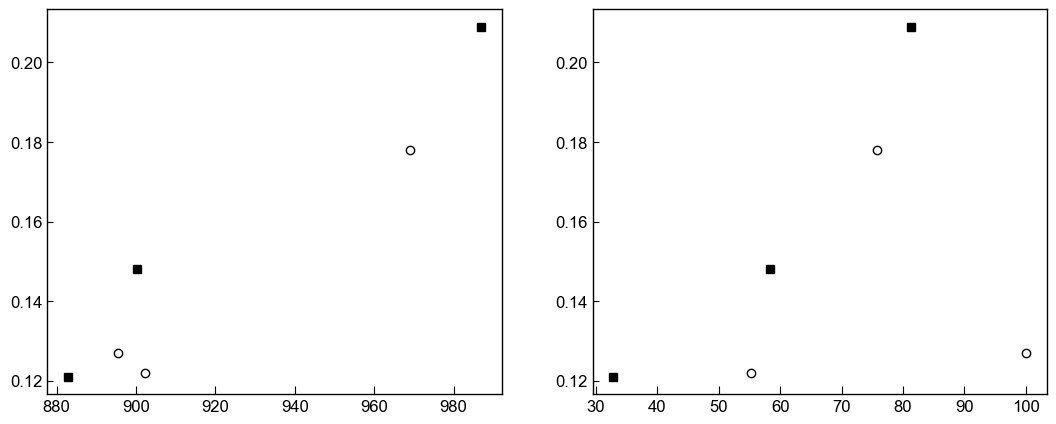

In [5]:
fig, ((ax3a), (ax4a)) = plt.subplots(1, 2, figsize=(12.9,5))
ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

## Fig for paper - Delta SCSS against PEC

In [6]:
Ulu_MI=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_1969_1974")
Ulu_MI=Ulu_MI.loc[Ulu_MI['PEC amount']<0]
Ulu_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MG_1969_1794")

{IF S isotopes set by degassing…}
However, as discussed above, this model would predict that the Cu contents of these high Fo, low S melt inclusions would remain high, as Cu is not very volatile in Kilauean melts. Although we do not have Cu data for the samples of Lerner et al. (2021), given the similarity of our samples to theirs in FeO-S and S-PEC space, we think it is reasonable to infer their MI would show similar Cu systematics to ours. 


## Loading in models from script S_Cu_Ni_Removal_Model.ipynb

In [7]:
Cu_Evolution=pd.read_excel('Cu_PEC_model.xlsx', sheet_name="Sheet1")
Se_Evolution=pd.read_excel('Se_PEC_model.xlsx', sheet_name="Sheet1")

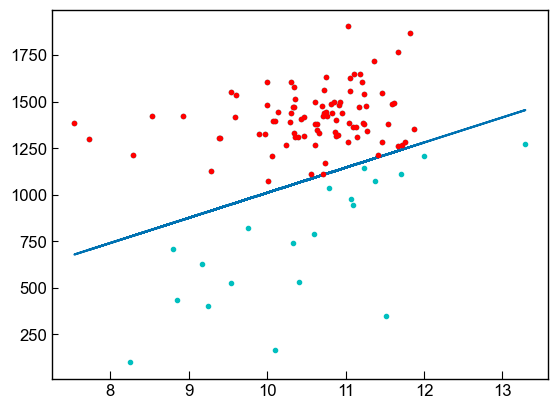

In [8]:
plt.plot(Ulu_MI['FeOt'], Ulu_MI['S_RAW'], '.c')
S_Degass_Ulu=grad*Ulu_MI['FeOt']+inter+70
plt.plot(Ulu_MI['FeOt'],S_Degass_Ulu )
Degass_Ulu=S_Degass_Ulu>Ulu_MI['S_RAW']
Undegass_Ulu=~Degass_Ulu
plt.plot(Ulu_MI['FeOt'].loc[Undegass_Ulu], Ulu_MI['S_RAW'].loc[Undegass_Ulu], '.r')

## Final 3 part stacked plot

## Part a)

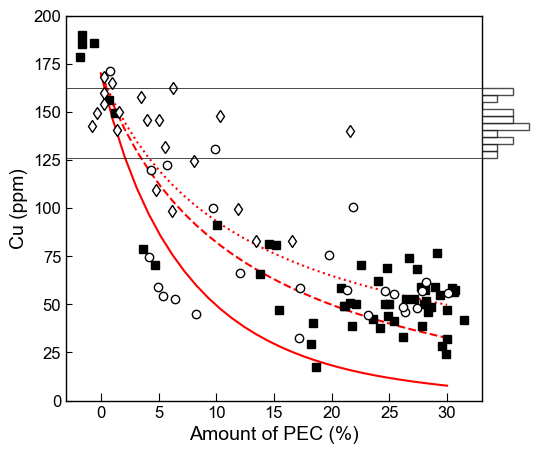

In [9]:
fig, ((ax3a),(ax3b)) = plt.subplots(1, 2, figsize=(6,5),gridspec_kw={'width_ratios': [4.2, 0.5]})
plt.subplots_adjust(wspace=0, hspace=0)
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_Frac'], '-r')
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_1400_req'], ':r')
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_1600_req'], '--r')

# ax3a.plot(-Ulu_MI['PEC amount'].loc[Undegass_Ulu], Ulu_MI['Cu_ppm_m65'].loc[Undegass_Ulu], 'sc', ms=3)
# Ulu_Has_Sulf=Ulu_MI['Sulfide?']=="Y"
# ax3a.plot(-Ulu_MI['PEC amount'].loc[Ulu_Has_Sulf&Undegass_Ulu], 
#           Ulu_MI['Cu_ppm_m65'].loc[Ulu_Has_Sulf&Undegass_Ulu], 'o', mfc='white', mec='c')


ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Degass],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Degass],  
         'dk', mfc='white')


# ax3b.hist(Ulu_MG['Cu_ppm_m65'],alpha=0.7,density=1,
#           orientation='horizontal',color='cyan', ec='k')
ax3b.hist(F8_MG['Cu_ppm_m65 LAICPMS'],alpha=0.7,density=1,
          orientation='horizontal',color='white', ec='k')
ax3a.plot([-5, 35],
    [np.min(F8_MG['Cu_ppm_m65 LAICPMS']), np.min(F8_MG['Cu_ppm_m65 LAICPMS'])],
                        '-k', lw=0.5)
ax3a.plot([-5, 35],
    [np.max(F8_MG['Cu_ppm_m65 LAICPMS']), np.max(F8_MG['Cu_ppm_m65 LAICPMS'])],
                        '-k', lw=0.5)

# ax3a.plot([-5, 35],
#     [np.min(Ulu_MG['Cu_ppm_m65']), np.min(Ulu_MG['Cu_ppm_m65'])],
#                         '-c', lw=0.5)
# ax3a.plot([-5, 35],
#     [np.max(Ulu_MG['Cu_ppm_m65']), np.max(Ulu_MG['Cu_ppm_m65'])],
#                         '-c', lw=0.5)
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.set_ylim([0, 200])
ax3a.set_ylim([0, 200])
ax3b.axis("off")
ax3a.set_xlim([-3, 33])
ax3a.set_xlabel('Amount of PEC (%)')
ax3a.set_ylabel('Cu (ppm)')
fig.savefig('Fig6a_Cu_Frac_Systematics.png', dpi=300, transparent=True)

## Ulu data - not using, but shows different trend as little FeO loss, so little sulfide

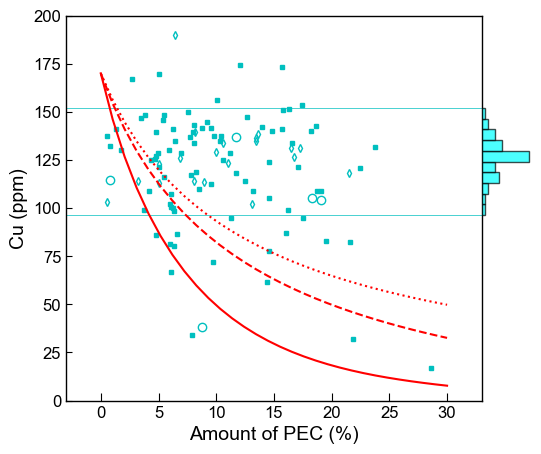

In [10]:
fig, ((ax3a),(ax3b)) = plt.subplots(1, 2, figsize=(6,5),gridspec_kw={'width_ratios': [4.2, 0.5]})
plt.subplots_adjust(wspace=0, hspace=0)

ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3a.plot(-Ulu_MI['PEC amount'].loc[Undegass_Ulu], Ulu_MI['Cu_ppm_m65'].loc[Undegass_Ulu], 'sc', ms=3)
ax3a.plot(-Ulu_MI['PEC amount'].loc[~Undegass_Ulu], Ulu_MI['Cu_ppm_m65'].loc[~Undegass_Ulu], 'dc', mfc='None', ms=4)

Ulu_Has_Sulf=Ulu_MI['Sulfide?']=="Y"
ax3a.plot(-Ulu_MI['PEC amount'].loc[Ulu_Has_Sulf&Undegass_Ulu], 
          Ulu_MI['Cu_ppm_m65'].loc[Ulu_Has_Sulf&Undegass_Ulu], 'o', mfc='white', mec='c')
ax3b.hist(Ulu_MG['Cu_ppm_m65'],alpha=0.7,density=1,
          orientation='horizontal',color='cyan', ec='k')
ax3a.plot([-5, 35],
    [np.min(Ulu_MG['Cu_ppm_m65']), np.min(Ulu_MG['Cu_ppm_m65'])],
                        '-c', lw=0.5)
ax3a.plot([-5, 35],
    [np.max(Ulu_MG['Cu_ppm_m65']), np.max(Ulu_MG['Cu_ppm_m65'])],
                        '-c', lw=0.5)
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_Frac'], '-r')
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_1400_req'], ':r')
ax3a.plot(Cu_Evolution['Amount PEC'], Cu_Evolution['Cu_Liq_1600_req'], '--r')

ax3a.set_ylim([0, 200])
ax3b.set_ylim([0, 200])
ax3b.axis("off")
ax3a.set_xlim([-3, 33])

ax3a.set_xlabel('Amount of PEC (%)')
ax3a.set_ylabel('Cu (ppm)')

fig.savefig('Cu_Ulu.png', dpi=300, transparent=True)

## Sulfur vs Cu

## Lets calculate a degassing trend
- Mason et al. (2021) put the ratio of X/SO2 for Cu of 4.12 mg/kg
- That is a X/S ratio of 2*4.12 mg/kg
- So for degassing 800 ppm of S, we would expect to degass....

In [11]:
# First, lets convert mg/kg into a g/g unit
g_g_unit=(2*4.12*10**-3)/1000
g_g_unit

8.24e-06

In [12]:
# So amount of Cu degassed
Cu_degassed=800*g_g_unit
Cu_degassed

0.006592000000000001

In [13]:
## Emanation coefficient - average is 0.007 %

In [14]:
100-100*(170-Cu_degassed)/170

0.0038776470588288703

## Part b and c

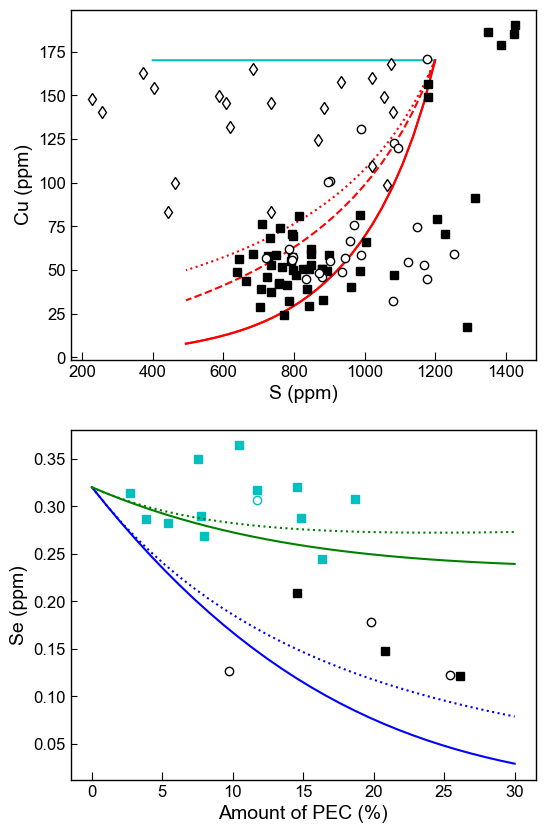

In [20]:
fig, ((ax3a), (ax4a)) = plt.subplots(2, 1, figsize=(6,10))
ax3a.plot(Cu_Evolution['S_Liq_Frac'], Cu_Evolution['Cu_Liq_Frac'], '-r')
ax3a.plot([1200, 1200-800], [170, 170-Cu_degassed], '-c')

ax3a.plot(Cu_Evolution['S_Liq_Frac'], Cu_Evolution['Cu_Liq_Frac'], '-r')
ax3a.plot(Cu_Evolution['S_Liq_Frac'], Cu_Evolution['Cu_Liq_1400_req'], ':r')
ax3a.plot(Cu_Evolution['S_Liq_Frac'], Cu_Evolution['Cu_Liq_1600_req'], '--r')



ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Degass],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Degass],  
         'dk', mfc='white')


# ax3a.plot(Ulu_MI['S_RAW'].loc[Ulu_Has_Sulf&Undegass_Ulu], 
#           Ulu_MI['Cu_ppm_m65'].loc[Ulu_Has_Sulf&Undegass_Ulu], 'o', mfc='white', mec='c')

# ax3a.plot(Ulu_MI['S_RAW'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 
#           Ulu_MI['Cu_ppm_m65'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 's', mfc='c', mec='c')

########################################33

ax4a.plot(-Ulu_MI['PEC amount'].loc[Ulu_Has_Sulf&Undegass_Ulu], 
          Ulu_MI['Se_96_ppm_m80'].loc[Ulu_Has_Sulf&Undegass_Ulu], 'o', mfc='white', mec='c')

ax4a.plot(-Ulu_MI['PEC amount'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 
          Ulu_MI['Se_96_ppm_m80'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 's', mfc='c', mec='c')

ax4a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax4a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax4a.plot(F8_MI['Amount  PEC (%)'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

ax4a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Brenan_req'], ':b')
ax4a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Brenan'], '-b')
ax4a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Patten_req'], ':g')
ax4a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Patten'], '-g')


ax4a.set_xlabel('Amount of PEC (%)')
ax4a.set_ylabel('Se (ppm)')

ax3a.set_xlabel('S (ppm)')
ax3a.set_ylabel('Cu (ppm)')

#plt.subplots_adjust(wspace=0.38, hspace=0)


fig.savefig('Fig6bc_Cu_S_Frac_Systematics.png', dpi=300, transparent=True)

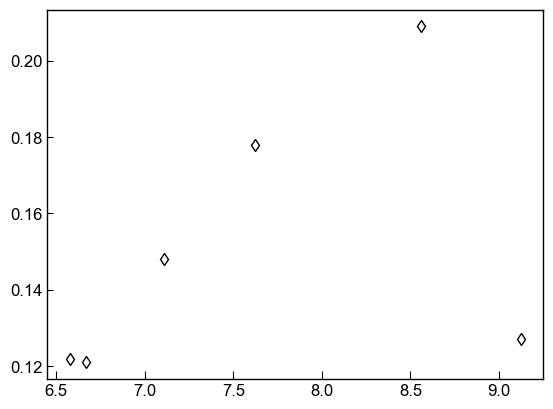

In [25]:
plt.plot(F8_MI['FeO_MI EPMA'],
         F8_MI['Se_96_ppm_m80'],  
         'dk', mfc='white')

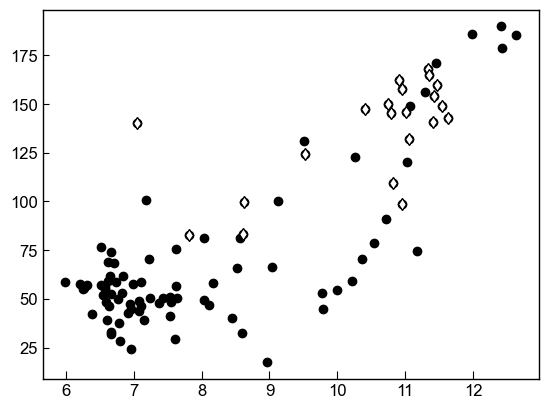

In [30]:


plt.plot(F8_MI['FeO_MI EPMA'],
         F8_MI['Cu_ppm_m65 LAICPMS'],  
         'ok', mfc='k')

plt.plot(F8_MI['FeO_MI EPMA'].loc[Degass],
         F8_MI['Cu_ppm_m65 LAICPMS'].loc[Degass],  
         'dk', mfc='white')

In [ ]:
plt.plot(F8_MI['Amount  PEC (%)'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

## What about Cu vs Se - if sulfide removal, correlated, else not

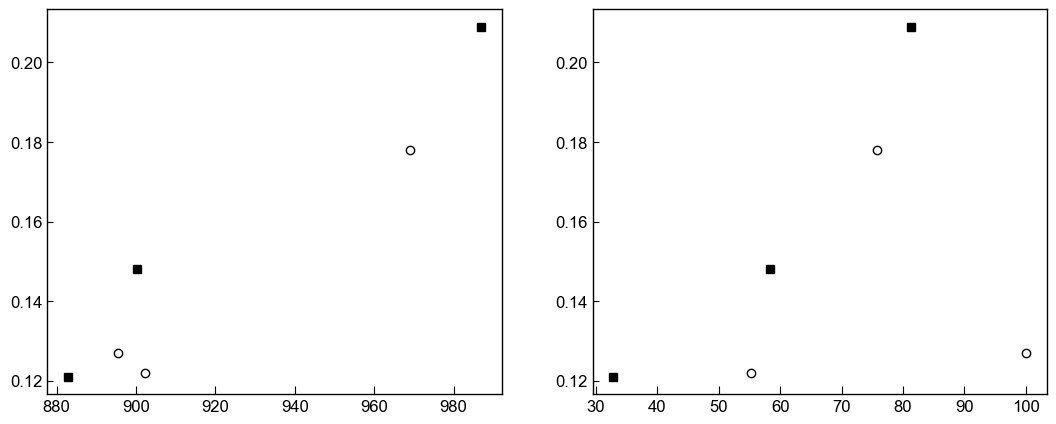

In [42]:
fig, ((ax3a), (ax4a)) = plt.subplots(1, 2, figsize=(12.9,5))
ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax4a.plot(F8_MI['Cu_ppm_m65 LAICPMS'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax3a.plot(F8_MI['S_MI EPMA (ppm)'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

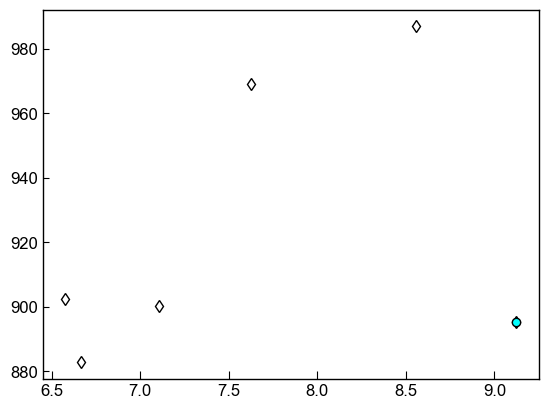

In [43]:
HasSe=F8_MI['Se_96_ppm_m80']>0
CuRight=F8_MI['Cu_ppm_m65 LAICPMS']>100
plt.plot(F8_MI['FeO_MI EPMA'].loc[HasSe],
         F8_MI['S_MI EPMA (ppm)'].loc[HasSe], 
         'dk', mfc='white')
plt.plot(F8_MI['FeO_MI EPMA'].loc[HasSe&CuRight],
         F8_MI['S_MI EPMA (ppm)'].loc[HasSe&CuRight], 
         'ok', mfc='cyan')

In [45]:
np.nanmedian(Ulu_MI['Se_96_ppm_m80'])

0.2875

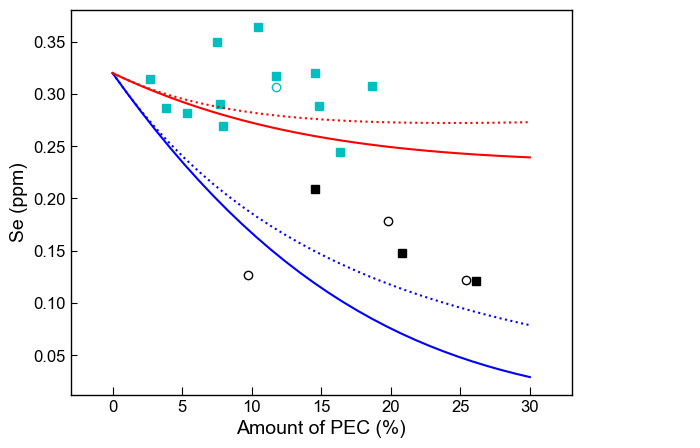

In [46]:
fig, ((ax3a),(ax3b)) = plt.subplots(1, 2, figsize=(8,5),gridspec_kw={'width_ratios': [4.2, 1]})
plt.subplots_adjust(wspace=0, hspace=0)


ax3a.plot(-Ulu_MI['PEC amount'].loc[Ulu_Has_Sulf&Undegass_Ulu], 
          Ulu_MI['Se_96_ppm_m80'].loc[Ulu_Has_Sulf&Undegass_Ulu], 'o', mfc='white', mec='c')

ax3a.plot(-Ulu_MI['PEC amount'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 
          Ulu_MI['Se_96_ppm_m80'].loc[(~Ulu_Has_Sulf)&Undegass_Ulu], 's', mfc='c', mec='c')

ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(~Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(~Has_Sulf_Wieser)],  
         'sk')

ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Undegass&(Has_Sulf_Wieser)],
         F8_MI['Se_96_ppm_m80'].loc[Undegass&(Has_Sulf_Wieser)],  
         'ok', mfc='white')

ax3a.plot(F8_MI['Amount  PEC (%)'].loc[Degass],
         F8_MI['Se_96_ppm_m80'].loc[Degass],  
         'dk', mfc='white')

ax3a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Brenan_req'], ':b')
ax3a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Brenan'], '-b')
ax3a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Patten_req'], ':r')
ax3a.plot(Se_Evolution['Amount PEC'], Se_Evolution['Se_Liq_Patten'], '-r')


ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.axis("off")

ax3a.set_xlim([-3, 33])
ax3a.set_xlabel('Amount of PEC (%)')
ax3a.set_ylabel('Se (ppm)')
fig.savefig('Se_Frac_Systematics.png', dpi=300, transparent=True)